<a href="https://colab.research.google.com/github/Tasks2/Regression/blob/main/DATA_SCIENCE_CAT2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Importing Libraries**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# **Loading DataSet**

In [ ]:
df=pd.read_csv('/content/Data science CAT2.csv')
df.head()

,VoterID,Color,Posts,Tweet,Hashtag,Candidate
0,1,black,2,negative,P2,Candidate A
1,2,black,6,positive,P1,Candidate A
2,3,pink,4,positive,P3,Candidate C
3,4,pink,0,neutral,P3,Candidate C
4,5,grey,2,positive,P2,Candidate B


## EDA

In [ ]:
df.isnull().sum()

VoterID      0
Color        0
Posts        0
Tweet        0
Hashtag      0
Candidate    0
dtype: int64

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Color']=le.fit_transform(df['Color'])
df['Tweet']=le.fit_transform(df['Tweet'])
df['Hashtag']=le.fit_transform(df['Hashtag'])
df['Candidate']=le.fit_transform(df['Candidate'])
df.head()

,VoterID,Color,Posts,Tweet,Hashtag,Candidate
0,1,0,2,0,1,0
1,2,0,6,2,0,0
2,3,2,4,2,2,2
3,4,2,0,1,2,2
4,5,1,2,2,1,1


# **Data Preparation**

## Dependent and Independent Variables

In [ ]:
X=df[{'Color', 'Tweet', 'Hashtag'}]
print(X.shape)
X

(30, 3)


<ipython-input-42-11585a576927>:1: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  X=df[{'Color', 'Tweet', 'Hashtag'}]


,Tweet,Color,Hashtag
0,0,0,1
1,2,0,0
2,2,2,2
3,1,2,2
4,2,1,1
5,2,1,1
6,2,2,2
7,2,1,0
8,2,2,1
9,1,0,0


In [ ]:
y=df['Candidate']
y

0     0
1     0
2     2
3     2
4     1
5     1
6     2
7     1
8     2
9     0
10    2
11    1
12    1
13    0
14    0
15    2
16    1
17    0
18    0
19    2
20    1
21    1
22    0
23    1
24    2
25    0
26    2
27    1
28    2
29    0
Name: Candidate, dtype: int64

## Data Splitting

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.25, random_state=12)

In [ ]:
X_train.shape

(22, 3)

# **Model Building**

## Training model

In [ ]:
from sklearn.linear_model import LogisticRegression
logr=LogisticRegression()
logr.fit(X_train,y_train)

LogisticRegression()

## Applying model

In [ ]:
y_predict=logr.predict(X_test)

In [ ]:
y_predict

array([1, 0, 0, 0, 0, 1, 1, 2])

# Evaluating model performance

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
acs=accuracy_score(y_test, y_predict)
cr=classification_report(y_test, y_predict)
print('Accuracy Score: %.2f' %acs)
print('Classification Report')
print(cr)

Accuracy Score: 1.00
Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         3
           2       1.00      1.00      1.00         1

    accuracy                           1.00         8
   macro avg       1.00      1.00      1.00         8
weighted avg       1.00      1.00      1.00         8



Text(0.5, 1.0, 'Confusion Matrix')

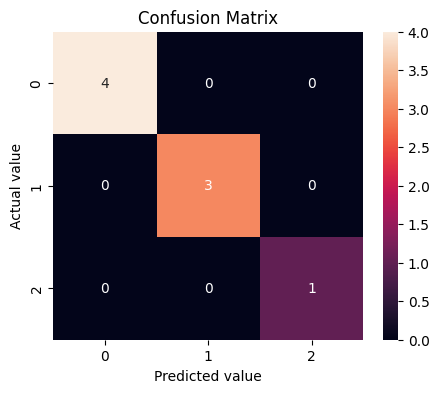

In [ ]:
cm=confusion_matrix(y_test, y_predict)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted value')
plt.ylabel('Actual value')
plt.title('Confusion Matrix')

#Using model for prediction

In [ ]:
logr.predict([[0,2,0]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([2])

# Saving model

In [ ]:
import joblib
joblib.dump(logr, 'ELECTION PREDICTOR.pkl')

['ELECTION PREDICTOR.pkl']